# ************************* Sales Data Analysis*****************************************

### From the company Sales data, we are going to address some important questions to improve decision making.

#### Now we are going to set up a working directory i.e. a common location where all our csv files coming from same or different source is saved 

#### After setting a working directory, we are going to use the glob() function to list only csv files from the working directory. You can read about glob() function [here](https://www.geeksforgeeks.org/getting-all-csv-files-from-a-directory-using-python/#:~:text=In%20order%20to%20locate%20all%20CSV%20files%2C%20whose,the%20CSV%20files%E2%80%99%20list%20located%20within%20the%20path.)

Dataset taken from Kaggle - https://www.kaggle.com/datasets/knightbearr/sales-product-data

#### Press 'Cntrl+Enter' to run each cell or 'Shift+Enter' which runs the cell and moves down to next cell to be run. 

In [428]:
#import the modules
import os
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import permutations, combinations
from collections import Counter
import plotly.graph_objects as go

In [20]:
# Now, we will use the glob function to list all csv files
path = 'E:\Data Analytics\Business Analytics\Sales Data Analysis\Dataset_Sales_Product_Data'
os.chdir(path)
csv_files = glob.glob('*.{}'.format('csv'))
csv_files

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [21]:
# Now to combine all the csv files we will use DataFrames in pandas library of Python
df_combined = pd.DataFrame()

#append all files together

for file in csv_files:
            df_temp = pd.read_csv(file)
            df_combined = df_combined.append(df_temp, ignore_index=True)
df_combined

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [22]:
#To see the top 5 Rows of our dataframe, we use .head() predefined method 
df_combined.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [23]:
# To view the column names in the dataframe
df_combined.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [24]:
df_combined.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [25]:
# Calculate and display total number of null values for columns in the dataframe
df_combined.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

Insight/Question - Look at the data. notice that some of products have same 'Order Id', 'Order Date(Containing same time)', 'Address' Which means that they were in same cart. We will analyze to find which items people buy combined/ at same time. We will address this insight later in this project.

In [26]:
df_combined.isnull()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,False,False,False,False,False,False
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
186845,False,False,False,False,False,False
186846,False,False,False,False,False,False
186847,False,False,False,False,False,False
186848,False,False,False,False,False,False


<AxesSubplot:>

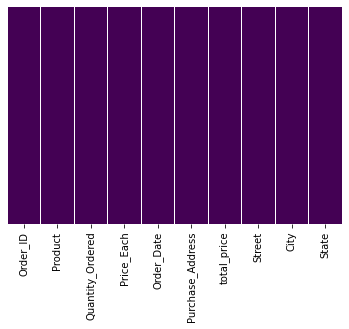

In [111]:
# Now we will use heatmap in seaborn(a data visualization library in Python) 
# to visualize the null values by columns to find which columns have more null values 
sns.heatmap(df_combined.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [28]:
#From the above heatmap, we see a straight line. That certainly means all the columns have same values. So we just drop the 
#rows which have NaN values.
df_combined.dropna(inplace = True)
df_combined

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


#### Now that we have done with handling missing values, we can further proceed with exploring the data.      

### What is Total number of sales(revenue) by selling all products ?

In [41]:
#df_combined['total_price'] = pd.to_numeric(df_combined['Quantity Ordered']) * pd.to_numeric(df_combined['Price Each'])

In [43]:
# Replace the spacing with underscore between column names for better Understanding
df_combined.columns = [c.replace(' ', '_') for c in df_combined.columns]

In [44]:
df_combined

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,total_price
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",8.97
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",700.00
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",700.00
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",379.99


In [45]:
df_combined = df_combined[df_combined.Order_ID != 'Order ID']

In [46]:
df_combined.iloc[2865]

Order_ID                                         179316
Product                                Wired Headphones
Quantity_Ordered                                      1
Price_Each                                        11.99
Order_Date                               04/08/19 18:21
Purchase_Address    129 2nd St, New York City, NY 10001
total_price                                       11.99
Name: 2877, dtype: object

In [47]:
# Convert type string to numeric using 'to_numeric()' method
# Calculate total price for the respective quantity ordered and Price_Each for each row by multiplying both.
df_combined['total_price'] = pd.to_numeric(df_combined['Quantity_Ordered']) * pd.to_numeric(df_combined['Price_Each'])

In [48]:
# See result of above
df_combined

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,total_price
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",8.97
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",700.00
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",700.00
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",379.99


In [49]:
# Now lets calculate total revenue of all the products 
tot_sales_by_revenue = df_combined['total_price'].sum()
tot_sales_by_revenue

34492035.97

###  What is Average Revenue Sales per month ?

In [50]:
avg_sales_revenue_per_month = tot_sales_by_revenue.mean()
avg_sales_revenue_per_month

34492035.97

### What is Average Sales per month by Volume ?

In [51]:
tot_sales_volume_per_month = pd.to_numeric(df_combined['Quantity_Ordered']).sum()
#tot_sales_volume_per_month
avg_sales_volume_per_month = pd.to_numeric(tot_sales_volume_per_month).mean()
avg_sales_volume_per_month

209079.0

### What is the Monthly revenue ?
####  Note - We have used lamda expressions in python to search for the month in the 'Order_date' column and taken the total price column and applied the sum predefined function to find the total revenue in that particular month

In [52]:
sale_months = ['Jan', 'Feb', 'Mar', 'April', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec' ]
jan_revenue = df_combined[df_combined['Order_Date'].apply(lambda exp:exp[0:2] == '01')]['total_price'].sum()
feb_revenue = df_combined[df_combined['Order_Date'].apply(lambda exp:exp[0:2] == '02')]['total_price'].sum()
march_revenue = df_combined[df_combined['Order_Date'].apply(lambda exp:exp[0:2] == '03')]['total_price'].sum()
april_revenue = df_combined[df_combined['Order_Date'].apply(lambda exp:exp[0:2] == '04')]['total_price'].sum()
may_revenue = df_combined[df_combined['Order_Date'].apply(lambda exp:exp[0:2] == '05')]['total_price'].sum()
june_revenue = df_combined[df_combined['Order_Date'].apply(lambda exp:exp[0:2] == '06')]['total_price'].sum()
july_revenue = df_combined[df_combined['Order_Date'].apply(lambda exp:exp[0:2] == '07')]['total_price'].sum()
aug_revenue = df_combined[df_combined['Order_Date'].apply(lambda exp:exp[0:2] == '08')]['total_price'].sum()
sep_revenue = df_combined[df_combined['Order_Date'].apply(lambda exp:exp[0:2] == '09')]['total_price'].sum()
oct_revenue = df_combined[df_combined['Order_Date'].apply(lambda exp:exp[0:2] == '10')]['total_price'].sum()
nov_revenue = df_combined[df_combined['Order_Date'].apply(lambda exp:exp[0:2] == '11')]['total_price'].sum()
dec_revenue = df_combined[df_combined['Order_Date'].apply(lambda exp:exp[0:2] == '12')]['total_price'].sum()
monthly_rev_list = [jan_revenue, feb_revenue, march_revenue, april_revenue, may_revenue, june_revenue, july_revenue, 
                    aug_revenue, sep_revenue, oct_revenue, nov_revenue, dec_revenue]
monthly_rev_list
#rev_april['total_price'].sum()

[1822256.73,
 2202022.42,
 2807100.38,
 3390670.2399999993,
 3152606.7499999995,
 2577802.26,
 2647775.76,
 2244467.88,
 2097560.13,
 3736726.8799999994,
 3199603.1999999997,
 4613443.34]

Text(0.5, 1.0, 'Monthly Revenue')

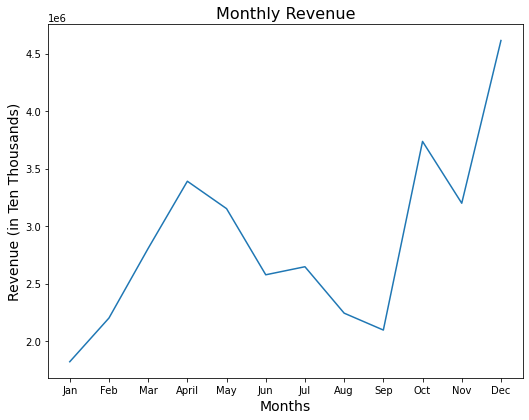

In [447]:
# Now we would use matplotlib to plot to show monthly revenue
# lets set the figure size using plt.figure method
plt.figure(figsize=(8.5,6.5))
# x and y axis data
plt.plot(sale_months, monthly_rev_list)
# X axis label
plt.xlabel('Months', fontsize = 14)
# Y axis label
plt.ylabel('Revenue (in Ten Thousands)', fontsize=14)
# title of the plot
plt.title('Monthly Revenue', fontsize = 16)

### What was the best month for sales? How much was earned in that month?
### Ans : Best Month - December.  
### Revenue in December - 4,613,443.34

### Which City has Maximum Number of Sales ?
#### To find city having maximum sales, we should find how many cities are there in the dataset and their respective number of sales

In [345]:
# First, we need to split the 'Purchase_Address' coloumn to split the city and create 3 different coloumns 
df_combined[['Street', 'City', 'State']]  = df_combined['Purchase_Address'].str.split(',', expand =True)
df_combined

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,total_price,Street,City,State
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,917 1st St,Dallas,TX 75001
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,682 Chestnut St,Boston,MA 02215
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,669 Spruce St,Los Angeles,CA 90001
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,669 Spruce St,Los Angeles,CA 90001
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,333 8th St,Los Angeles,CA 90001
...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",8.97,840 Highland St,Los Angeles,CA 90001
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",700.00,216 Dogwood St,San Francisco,CA 94016
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",700.00,220 12th St,San Francisco,CA 94016
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",379.99,511 Forest St,San Francisco,CA 94016


In [85]:
# Now that we have got coloumn 'City' w eshould find how many cities are there and their names
cities = df_combined['City'].unique()
cities

array([' Dallas', ' Boston', ' Los Angeles', ' San Francisco', ' Seattle',
       ' Atlanta', ' New York City', ' Portland', ' Austin'], dtype=object)

In [86]:
# We got the city names. Now let's move ahead to find their annual revenue
city_rev = df_combined.groupby('City').total_price.sum()
city_rev

City
 Atlanta          2795498.58
 Austin           1819581.75
 Boston           3661642.01
 Dallas           2767975.40
 Los Angeles      5452570.80
 New York City    4664317.43
 Portland         2320490.61
 San Francisco    8262203.91
 Seattle          2747755.48
Name: total_price, dtype: float64

In [204]:
city_rev.max()

8262203.91

In [98]:
df_city_col = pd.DataFrame(city_rev)
df_city_col

,total_price
City,
Atlanta,2795498.58
Austin,1819581.75
Boston,3661642.01
Dallas,2767975.40
Los Angeles,5452570.80
New York City,4664317.43
Portland,2320490.61
San Francisco,8262203.91
Seattle,2747755.48


In [88]:
df_city_col[df_city_col['total_price'] == df_city_col['total_price'].max()]
### So, the city having maximum sales is - San Franscisco and the revenue earned from it is shown below

,total_price
City,
San Francisco,8262203.91


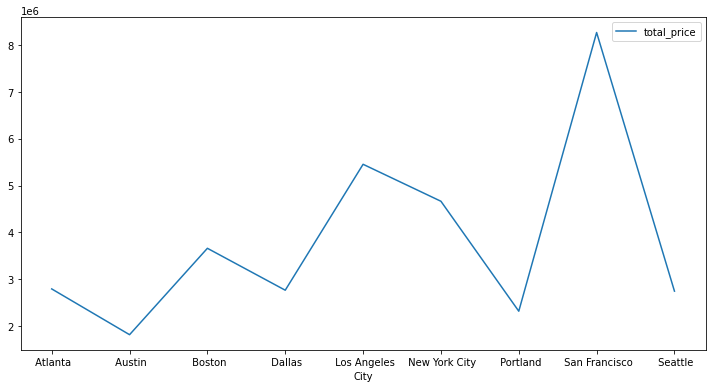

In [283]:
fig = plt.gcf()
fig.set_size_inches(10, 5.5)
sns.lineplot(data = df_city_col)
plt.tight_layout()

#### Clearly, we can see from the above graph that the City having maximum number of sales is 'San Francisco'

### Now let's explore on 'Products' the customers buy.

##  What is the Most Sold Product ?

In [242]:
# To find the most sold product, we have to take the count of all unique products in our dataset
df_combined[['Product', 'Quantity_Ordered']]

,Product,Quantity_Ordered
0,USB-C Charging Cable,2
2,Bose SoundSport Headphones,1
3,Google Phone,1
4,Wired Headphones,1
5,Wired Headphones,1
...,...,...
186845,AAA Batteries (4-pack),3
186846,iPhone,1
186847,iPhone,1
186848,34in Ultrawide Monitor,1


In [421]:
df_combined.groupby('Product').Quantity_Ordered.count()


Product
20in Monitor                   4101
27in 4K Gaming Monitor         6230
27in FHD Monitor               7507
34in Ultrawide Monitor         6181
AA Batteries (4-pack)         20577
AAA Batteries (4-pack)        20641
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
Flatscreen TV                  4800
Google Phone                   5525
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      21657
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
USB-C Charging Cable          21903
Vareebadd Phone                2065
Wired Headphones              18882
iPhone                         6842
Name: Quantity_Ordered, dtype: int64

In [256]:
df_combined.groupby('Product').Quantity_Ordered.count().max()

21903

In [56]:
#Let's create a dataframe for this to work on 
df_product_tot_quant = pd.DataFrame(df_combined.groupby('Product').Quantity_Ordered.count())
df_product_tot_quant

,Quantity_Ordered
Product,
20in Monitor,4101
27in 4K Gaming Monitor,6230
27in FHD Monitor,7507
34in Ultrawide Monitor,6181
AA Batteries (4-pack),20577
AAA Batteries (4-pack),20641
Apple Airpods Headphones,15549
Bose SoundSport Headphones,13325
Flatscreen TV,4800


Text(0.5, 1.0, 'Quanities of Products sold in 2019')

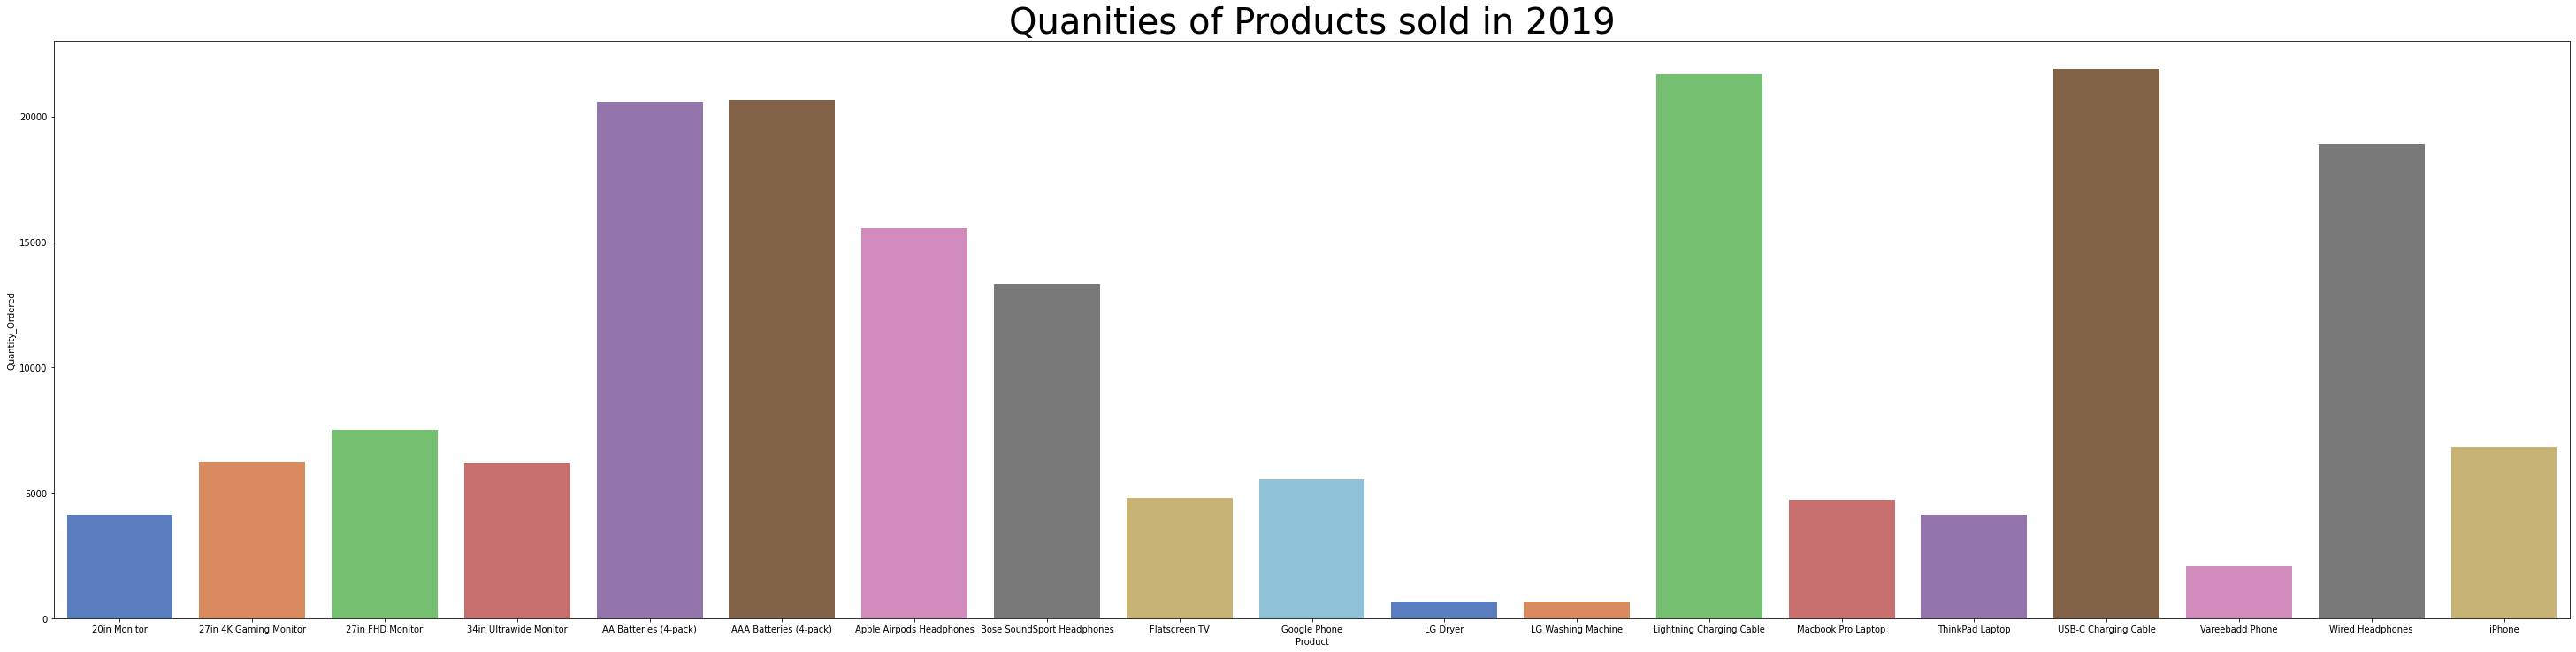

In [301]:
# Plot the quantites
fig = plt.gcf()
fig.set_size_inches(51, 12)
sns.barplot(x = df_product_tot_quant.index, y = df_product_tot_quant['Quantity_Ordered'], 
            data = df_product_tot_quant, palette = 'muted')
plt.title('Quanities of Products sold in 2019', fontsize = 40)

In [57]:
df_product_tot_quant[df_product_tot_quant['Quantity_Ordered'] == df_product_tot_quant['Quantity_Ordered'].max()]

,Quantity_Ordered
Product,
USB-C Charging Cable,21903


#### Now, we know that the product which is sold the most is 'USB-C Charging Cable' and the sales quantity is '21903'.

Let's explore more on this by trying to find out why and when it is sold the most. Is there any specific time or pattern in in the sales of this product

In [58]:
df_usb_c_dates = pd.DataFrame(df_combined[df_combined['Product'] == 'USB-C Charging Cable']['Order_Date'])
df_usb_c_dates['Quantity_Ordered'] = df_combined['Quantity_Ordered']
df_usb_c_dates

,Order_Date,Quantity_Ordered
0,04/19/19 08:46,2
6,04/29/19 13:03,1
8,04/12/19 10:58,1
17,04/27/19 18:41,1
19,04/03/19 19:42,1
...,...,...
186830,09/12/19 23:43,2
186834,09/14/19 19:30,1
186842,09/30/19 13:49,1
186844,09/07/19 15:49,1


In [59]:
df_usb_c_dates[['Month', 'Date', 'Year']] = df_usb_c_dates['Order_Date'].str.split('/', expand = True)
df_usb_c_dates

,Order_Date,Quantity_Ordered,Month,Date,Year
0,04/19/19 08:46,2,04,19,19 08:46
6,04/29/19 13:03,1,04,29,19 13:03
8,04/12/19 10:58,1,04,12,19 10:58
17,04/27/19 18:41,1,04,27,19 18:41
19,04/03/19 19:42,1,04,03,19 19:42
...,...,...,...,...,...
186830,09/12/19 23:43,2,09,12,19 23:43
186834,09/14/19 19:30,1,09,14,19 19:30
186842,09/30/19 13:49,1,09,30,19 13:49
186844,09/07/19 15:49,1,09,07,19 15:49


In [60]:
g = df_usb_c_dates[['Month', 'Quantity_Ordered']]
g.groupby('Month').count()

,Quantity_Ordered
Month,
01,1174
02,1514
03,1770
04,2078
05,1883
06,1534
07,1668
08,1344
09,1454


Text(0.5, 1.0, ' Sales of USB-C Charging Cable by Month')

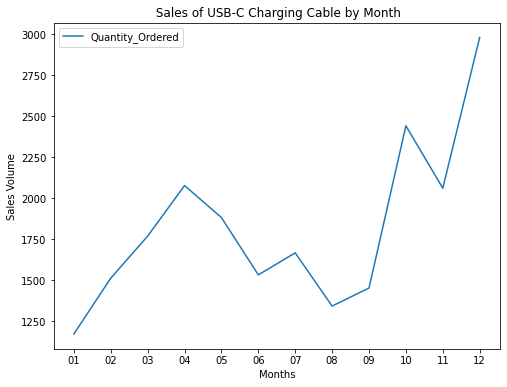

In [302]:
#plt.plot( g.groupby('Month').count())
#plt.xlabel('Months')
#plt.ylabel('Sales Volume')
#plt.tight_layout()
fig = plt.gcf()
fig.set_size_inches(8, 6)
sns.lineplot(data = g.groupby('Month').count())
plt.xlabel('Months')
plt.ylabel('Sales Volume')
plt.title(' Sales of USB-C Charging Cable by Month')

#### In the above graph, we observe that there are specific instances when the sale goes up and down. Let's try to find if there is any particular reason to it. We will now analyze if other products influence the sales of the above product.

In [66]:
# For this, let's try to find which products require usb-c charging cable.
#List all the products
df_combined['Product'].unique()

array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor'],
      dtype=object)

In [67]:
#Now, let's create dataframes for all the products and plot their monthly sales to see the pattern.
# Bose Heaphones
df_bose_dates = pd.DataFrame(df_combined[df_combined['Product'] == 'Bose SoundSport Headphones']['Order_Date'])
df_bose_dates['Quantity_Ordered'] = df_combined['Quantity_Ordered']
df_bose_dates[['Month', 'Date', 'Year']] = df_bose_dates['Order_Date'].str.split('/', expand = True)
h = df_bose_dates[['Month', 'Quantity_Ordered']]
h.groupby('Month').count()
#df_bose_dates
# Google Phone
df_googlephone_dates = pd.DataFrame(df_combined[df_combined['Product'] == 'Google Phone']['Order_Date'])
df_googlephone_dates['Quantity_Ordered'] = df_combined['Quantity_Ordered']
df_googlephone_dates[['Month', 'Date', 'Year']] = df_googlephone_dates['Order_Date'].str.split('/', expand = True)
i = df_googlephone_dates[['Month', 'Quantity_Ordered']]
i.groupby('Month').count()
# Macbook laptop
df_mac_dates = pd.DataFrame(df_combined[df_combined['Product'] == 'Macbook Pro Laptop']['Order_Date'])
df_mac_dates['Quantity_Ordered'] = df_combined['Quantity_Ordered']
df_mac_dates[['Month', 'Date', 'Year']] = df_mac_dates['Order_Date'].str.split('/', expand = True)
j = df_mac_dates[['Month', 'Quantity_Ordered']]
j.groupby('Month').count()
#iPhone 
df_iphone_dates = pd.DataFrame(df_combined[df_combined['Product'] == 'iPhone']['Order_Date'])
df_iphone_dates['Quantity_Ordered'] = df_combined['Quantity_Ordered']
df_iphone_dates[['Month', 'Date', 'Year']] = df_iphone_dates['Order_Date'].str.split('/', expand = True)
k = df_iphone_dates[['Month', 'Quantity_Ordered']]
k.groupby('Month').count()
# ThinkPad Laptop
df_thinkpad_dates = pd.DataFrame(df_combined[df_combined['Product'] == 'ThinkPad Laptop']['Order_Date'])
df_thinkpad_dates['Quantity_Ordered'] = df_combined['Quantity_Ordered']
df_thinkpad_dates[['Month', 'Date', 'Year']] = df_thinkpad_dates['Order_Date'].str.split('/', expand = True)
l = df_thinkpad_dates[['Month', 'Quantity_Ordered']]
l.groupby('Month').count()
# Vareebadd Phone
df_vbadphone_dates = pd.DataFrame(df_combined[df_combined['Product'] == 'Vareebadd Phone']['Order_Date'])
df_vbadphone_dates['Quantity_Ordered'] = df_combined['Quantity_Ordered']
df_vbadphone_dates[['Month', 'Date', 'Year']] = df_vbadphone_dates['Order_Date'].str.split('/', expand = True)
m = df_vbadphone_dates[['Month', 'Quantity_Ordered']]
m.groupby('Month').count() 

,Quantity_Ordered
Month,
01,125
02,129
03,174
04,220
05,185
06,155
07,146
08,141
09,126


In [73]:
# Now lets visualize all of these to see the trends
from functools import reduce
frames = [h.groupby('Month').count(), i.groupby('Month').count(), j.groupby('Month').count(), k.groupby('Month').count(), 
          l.groupby('Month').count(), m.groupby('Month').count()]
count_comb = reduce(lambda  left,right: pd.merge(left,right,on=['Month'], how='outer'), frames)
count_comb

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Quantity_Ordered_x'} in the result is deprecated and will raise a MergeError in a future version.
  """


,Quantity_Ordered_x,Quantity_Ordered_y,Quantity_Ordered_x,Quantity_Ordered_y,Quantity_Ordered_x,Quantity_Ordered_y
Month,,,,,,
01,659,318,235,381,218,125
02,831,379,276,439,275,129
03,1184,463,379,537,345,174
04,1279,580,452,691,390,220
05,1167,479,464,640,371,185
06,973,391,355,533,314,155
07,1051,411,368,501,319,146
08,872,359,299,439,274,141
09,824,341,288,396,249,126


In [109]:
# Lets label these columns with their respective product name
count_comb.columns = ['Bose', 'Google Phone', 'Mac', 'iphone', 'Thinkpad', 'vbadphone']
count_comb

,Bose,Google Phone,Mac,iphone,Thinkpad,vbadphone
Month,,,,,,
01,659,318,235,381,218,125
02,831,379,276,439,275,129
03,1184,463,379,537,345,174
04,1279,580,452,691,390,220
05,1167,479,464,640,371,185
06,973,391,355,533,314,155
07,1051,411,368,501,319,146
08,872,359,299,439,274,141
09,824,341,288,396,249,126


Text(0.5, 1.0, 'Quantites Sold by Products')

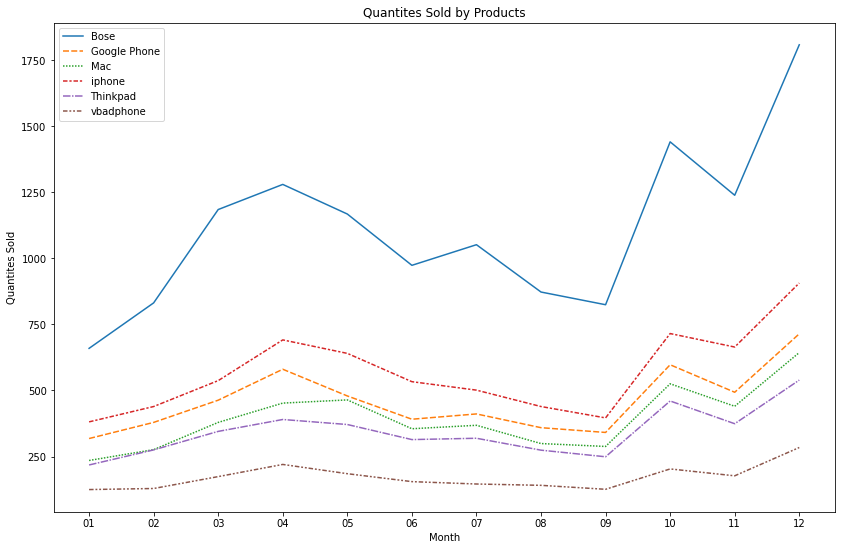

In [132]:
fig = plt.gcf()
fig.set_size_inches(14, 9)
sns.lineplot(data = count_comb)
plt.ylabel('Quantites Sold')
plt.title("Quantites Sold by Products")

## Which products are bought together frequently ?

In [346]:
# Our main DataFrame
df_combined

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,total_price,Street,City,State
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,917 1st St,Dallas,TX 75001
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,682 Chestnut St,Boston,MA 02215
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,669 Spruce St,Los Angeles,CA 90001
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,669 Spruce St,Los Angeles,CA 90001
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,333 8th St,Los Angeles,CA 90001
...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",8.97,840 Highland St,Los Angeles,CA 90001
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",700.00,216 Dogwood St,San Francisco,CA 94016
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",700.00,220 12th St,San Francisco,CA 94016
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",379.99,511 Forest St,San Francisco,CA 94016


In [275]:
# Lets create a dataframe to group the products according to their order ids. 
df_cart = df_combined[df_combined['Order_ID'].duplicated(keep = False)]
df_cart['Frequent_Cart'] = df_cart.groupby('Order_ID')['Product'].transform(lambda x: ', '.join(x))
df_cart = df_cart[['Order_ID', 'Frequent_Cart']].drop_duplicates()
df_cart.head()

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Order_ID,Frequent_Cart
3,176560,"Google Phone, Wired Headphones"
18,176574,"Google Phone, USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones, Bose SoundSport He..."
32,176586,"AAA Batteries (4-pack), Google Phone"
119,176672,"Lightning Charging Cable, USB-C Charging Cable"


In [276]:
#Count each row combination by pairing of two
count = Counter()
for row in df_cart['Frequent_Cart']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
dl= count
print(dl)

Counter({('iPhone', ' Lightning Charging Cable'): 1005, ('Google Phone', ' USB-C Charging Cable'): 987, ('iPhone', ' Wired Headphones'): 447, ('Google Phone', ' Wired Headphones'): 414, ('Vareebadd Phone', ' USB-C Charging Cable'): 361, ('iPhone', ' Apple Airpods Headphones'): 360, ('Google Phone', ' Bose SoundSport Headphones'): 220, ('Vareebadd Phone', ' Wired Headphones'): 143, (' USB-C Charging Cable', ' Wired Headphones'): 120, ('Vareebadd Phone', ' Bose SoundSport Headphones'): 80, (' Lightning Charging Cable', ' Wired Headphones'): 62, ('Lightning Charging Cable', ' USB-C Charging Cable'): 55, ('Lightning Charging Cable', ' AA Batteries (4-pack)'): 52, (' USB-C Charging Cable', ' Bose SoundSport Headphones'): 51, ('Lightning Charging Cable', ' Lightning Charging Cable'): 51, ('AA Batteries (4-pack)', ' Lightning Charging Cable'): 51, ('AAA Batteries (4-pack)', ' USB-C Charging Cable'): 50, ('AA Batteries (4-pack)', ' AAA Batteries (4-pack)'): 48, ('AAA Batteries (4-pack)', ' AAA

In [424]:
df_basket = pd.DataFrame.from_dict(dl, orient = 'index').reset_index()
df_basket.rename(columns={'index': 'Basket', 0: 'Frequency'}, inplace = True)
df_basket.sort_values(by = 'Frequency',ascending = False, inplace = True)
df_basket

,Basket,Frequency
8,"(iPhone, Lightning Charging Cable)",1005
1,"(Google Phone, USB-C Charging Cable)",987
13,"(iPhone, Wired Headphones)",447
0,"(Google Phone, Wired Headphones)",414
22,"(Vareebadd Phone, USB-C Charging Cable)",361
...,...,...
302,"( Wired Headphones, Wired Headphones)",1
301,"(20in Monitor, 34in Ultrawide Monitor)",1
78,"(27in 4K Gaming Monitor, Vareebadd Phone)",1
299,"(LG Dryer, 27in FHD Monitor)",1


In [426]:
df_basket_split = pd.DataFrame(df_basket).reset_index()
df_basket_split['Item1'], df_basket_split['Item2'] = zip(*df_basket_split.Basket)
df_basket_split

,index,Basket,Frequency,Item1,Item2
0,8,"(iPhone, Lightning Charging Cable)",1005,iPhone,Lightning Charging Cable
1,1,"(Google Phone, USB-C Charging Cable)",987,Google Phone,USB-C Charging Cable
2,13,"(iPhone, Wired Headphones)",447,iPhone,Wired Headphones
3,0,"(Google Phone, Wired Headphones)",414,Google Phone,Wired Headphones
4,22,"(Vareebadd Phone, USB-C Charging Cable)",361,Vareebadd Phone,USB-C Charging Cable
...,...,...,...,...,...
351,302,"( Wired Headphones, Wired Headphones)",1,Wired Headphones,Wired Headphones
352,301,"(20in Monitor, 34in Ultrawide Monitor)",1,20in Monitor,34in Ultrawide Monitor
353,78,"(27in 4K Gaming Monitor, Vareebadd Phone)",1,27in 4K Gaming Monitor,Vareebadd Phone
354,299,"(LG Dryer, 27in FHD Monitor)",1,LG Dryer,27in FHD Monitor


#### Lets plot and visualize. I have used Plotly which is a graphing library for Python. I read the documentation and referred the code snippet from the documentation. Click [here](https://plotly.com/python/bubble-charts/) to refer. The size of the bubble represents the frequency(hover your mouse cursor to see the frequency). 

In [440]:

#import plotly.graph_objects as go

size = np.array(df_basket_split['Frequency'])
gik = plt.gcf()
gik.set_size_inches(20,14)
fig = go.Figure(data=[go.Scatter(
    x= df_basket_split['Item1'],
    y= df_basket_split['Item2'],
    text = df_basket_split['Frequency'],
    mode='markers',
    marker=dict(
        size=size,
        sizemode='area',
        sizeref=2.*max(size)/(48.**2),
        sizemin=4
    )
)])

fig.show()

<Figure size 1440x1008 with 0 Axes>

### What time should we display adverstisement to maximize likelihood of customer's buying product?

In [354]:
# Lets create a dataframe to work on
df_adv = pd.DataFrame(df_combined)
# convert the column 'Order_Date' to datetime format for operations
df_adv['Order_Date'] = pd.to_datetime(df_adv['Order_Date'])
#Create columns for Month and Hour
df_adv['Month'] = df_adv['Order_Date'].dt.month
df_adv['Hour'] = df_adv['Order_Date'].dt.hour
# Display DataFrame
df_adv

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,total_price,Street,City,State,Month,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,917 1st St,Dallas,TX 75001,4,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,682 Chestnut St,Boston,MA 02215,4,22
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,669 Spruce St,Los Angeles,CA 90001,4,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,669 Spruce St,Los Angeles,CA 90001,4,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,333 8th St,Los Angeles,CA 90001,4,9
...,...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",8.97,840 Highland St,Los Angeles,CA 90001,9,20
186846,259354,iPhone,1,700,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",700.00,216 Dogwood St,San Francisco,CA 94016,9,16
186847,259355,iPhone,1,700,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",700.00,220 12th St,San Francisco,CA 94016,9,7
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",379.99,511 Forest St,San Francisco,CA 94016,9,17


In [377]:
# Now lets calculate hourly sales for combined total of all months for that times in hour
hourly_sales = df_adv.groupby(['Hour']).sum()
#hourly_sales['Orders'] 
mtl = df_adv.groupby(['Hour']).count()
mtl['Quantity_Ordered']
hourly_sales['Orders'] = mtl['Quantity_Ordered']
hourly_sales

,total_price,Month,Orders
Hour,,,
0,713721.27,27554,3910
1,460866.88,16657,2350
2,234851.44,8507,1243
3,145757.89,5904,831
4,162661.01,6148,854
5,230679.82,9301,1321
6,448113.00,17539,2482
7,744854.12,28850,4011
8,1192348.97,43626,6256


Text(0, 0.5, 'No. of Orders')

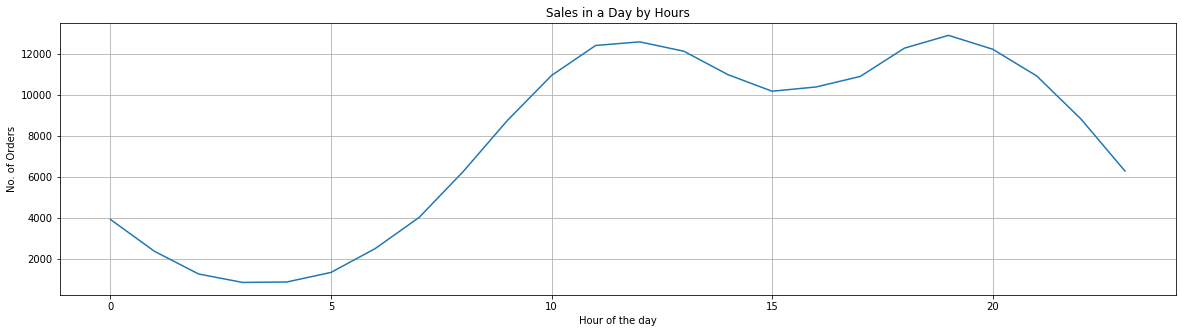

In [378]:
#Lets plot the Data to visualize the times in a day for advertisement
plt.figure(figsize=(20,5))
plt.plot(hourly_sales.index, hourly_sales['Orders'])
plt.grid(True)
plt.title("Sales in a Day by Hours")
plt.xlabel("Hour of the day")
plt.ylabel("No. of Orders")

### Thus we find that the sales are high from 10 AM, then lowers down around 3 PM and again surges till about 7 PM and then decreases gradually. So, the advertisements flashed just before these peak hours can definitely increase the likelihood of customer purchasing the product. 